# This jupyter notebook is a basic template to help you visualize your received data from the PhotonQ backend.

## 1. The first block performs all necessary imports and loads your results from the result json file, which can be downloaded from the PhotonQ website.

## The data fields for the single-photon detectors have dummy values, like "123," when the circuit is performed on our current simulator.

## The coincidence counts represent the number of measured coincidences for the labeled channels. If the circuit was run through our current simulator, the fields display the number of projections on each state.

## Upload your results to the file directory on the left side bar and paste the filename into the script at the marked location. Then execute each block of the script one at a time.

In [1]:
# first we do all the necessary imports
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# here please replace "results" with "your file name"
filename = "results"

# opens JSON result file
file = open(filename + ".json")

# returns JSON object as a dictionary
data = json.load(file)

# prints the result file in the console
print("Results:")
print(json.dumps(data, indent = 1))

Results:
{
 "experiment": "bc9b82de-ce8f-440d-a3de-3ab636b611d8",
 "startTime": "2021-12-22T15:27:57.390613Z",
 "totalCounts": 50000,
 "numberOfDetectors": 4,
 "singlePhotonRate": "1500.00",
 "totalTime": 3,
 "experimentData": {
  "countratePerDetector": {
   "d1": 123,
   "d2": 123,
   "d3": 456,
   "d4": 123,
   "d5": 123,
   "d6": 456,
   "d7": 123,
   "d8": 123
  },
  "coincidenceCounts": {
   "c00": 345,
   "c01": 15064,
   "c10": 13444,
   "c11": 99
  }
 }
}


## 2. Here, in the second block, the data fields are loaded and shown

In [2]:
# Access single countrates
singleCounts = data["experimentData"]["countratePerDetector"]
print("Single Counts per Detector:")
print(singleCounts)

# Access coincidence counts 
coincidenceCounts = data["experimentData"]["coincidenceCounts"]
print("Coincidence Counts:")
print(coincidenceCounts)

Single Counts per Detector:
{'d1': 123, 'd2': 123, 'd3': 456, 'd4': 123, 'd5': 123, 'd6': 456, 'd7': 123, 'd8': 123}
Coincidence Counts:
{'c00': 345, 'c01': 15064, 'c10': 13444, 'c11': 99}


## 3. This block presents the data as a histogramm 

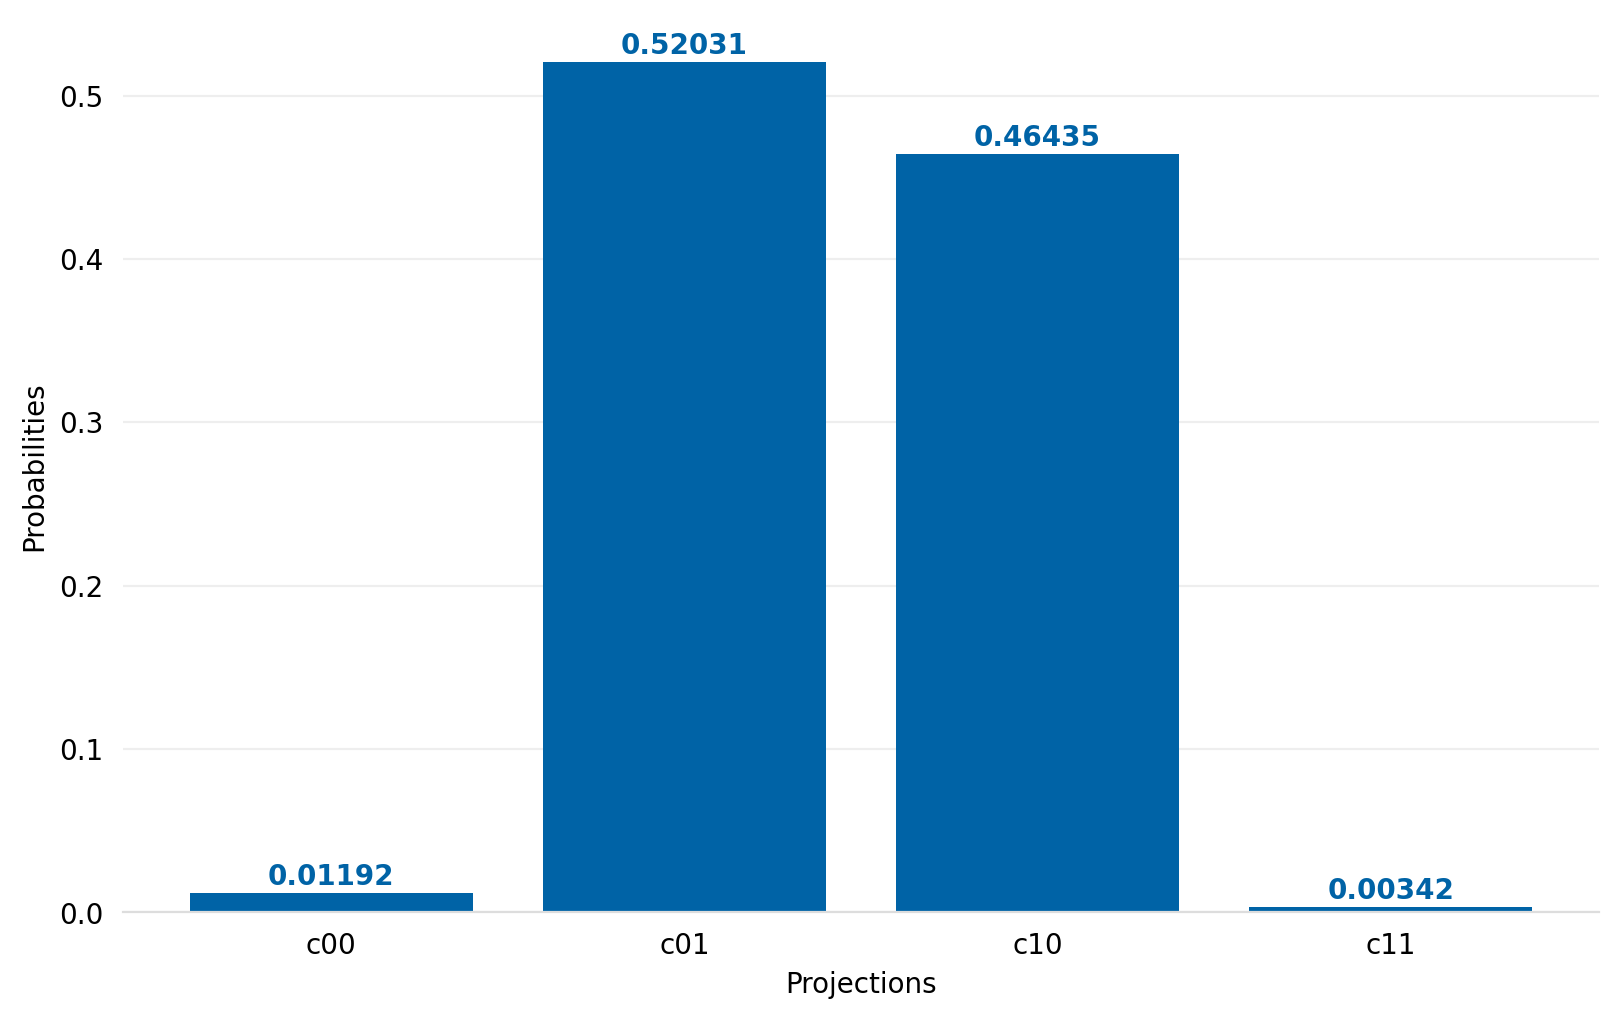

In [3]:
# Return values from dictionary "Coincidence Counts"
values = coincidenceCounts.values()

# Compute sum of the values
total = sum(values)

# Return keys from dictionary "Coincidence Counts"
keys = coincidenceCounts.keys()

probability_list = []
for i in keys:
    probability = coincidenceCounts[i]/total
    probability_list.append(probability)
    
# Plot probabilities

plt.rcParams['figure.figsize'] = (8, 5)

fig, ax = plt.subplots(dpi=200)

bars = ax.bar(
    coincidenceCounts.keys(), probability_list, color='#0063A6'
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.005,
      round(bar.get_height(), 5),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )


fig.tight_layout()

plt.ylabel("Probabilities")
plt.xlabel("Projections")
plt.show()

## 4. This section optionally closes the results file from above

In [4]:
# Closing file
file.close()